# PCA and TSNE Analysis of Paired Dataset
### April 10 2024

PCA and TSNE analyses of pairwise dataset

In [899]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn import tree
import pydotplus
from IPython.display import Image
import mpl_axes_aligner

from sklearn.impute import SimpleImputer

In [900]:
pairwise = [['ASD', 'AD'], ['ASD', 'PD'], ['ASD', 'MS'],
            ['AD', 'PD'], ['AD', 'MS'],
            ['PD', 'MS']]

color_map = {'AD': '#666666',
             'ASD':'#F0027F',
             'MS': '#FDC086',
             'PD': '#7FC97F'}

# load in data:
df = pd.read_csv('../Data/20440_cleaned_data.csv')

diagnosis = ['AD', 'ASD', 'MS', 'PD']

for diag in diagnosis:
    for feature in df.columns:
        drop = 0
        for val in df[feature].loc[df['Diagnosis'] == diag]:
            if val != 0:
                drop +=1
        if drop == 0:
            df = df.drop([feature], axis=1)


# This is for trimming out a certain amount of a diagnosis if we want more equal sizes
# for diag in diagnoses:
#     indexdiag = df[df['Diagnosis'] == diag].index
#     df = df.drop(indexdiag[50:])

# This is for dropping certain diagnoses for troubleshooting
df_pair = []


for pair in pairwise:
    df_i = df.loc[(df['Diagnosis'] == pair[0]) | (df['Diagnosis'] == pair[1])]
    df_pair.append(df_i)


# For dropping diagnosis column so we can feed data in:
data_pair = []

for dataset in df_pair:
    data_pair_i = dataset.drop(['Diagnosis'], axis=1) # data without diagnosis column
    data_pair_i = data_pair_i.drop(['Unknown'], axis=1)
    data_pair_i = data_pair_i.loc[:, (data_pair_i != 0).any(axis=0)] # delete any columns with all zeros
    data_pair.append(data_pair_i)

data_pair_big = []

for dataset in df_pair_big:
    data_pair_i = dataset.drop(['Diagnosis'], axis=1) # data without diagnosis column
    data_pair_i = data_pair_i.drop(['Unknown'], axis=1)
    data_pair_i = data_pair_i.loc[:, (data_pair_i != 0).any(axis=0)] # delete any columns with all zeros
    data_pair_big.append(data_pair_i)

# make a list of diagnoses:
diagnosis_pair = []
diagnosis_pair_big = []

for dataset in df_pair:
    diagnosis_pair.append(list(dataset["Diagnosis"]))

for dataset in df_pair_big:
    diagnosis_pair_big.append(list(dataset["Diagnosis"]))

Imputation, if necessary:

In [901]:
# data_pair_1 = [] 
# for i in data_pair:
#     imp_mean = SimpleImputer(missing_values=0, strategy='mean')
#     imp_mean.fit(i)
#     out = imp_mean.transform(i)
#     columns = i.columns
#     data_pair_1.append(pd.DataFrame(out, columns=columns))

data_pair_1 = data_pair

In [902]:
data_pair[0]

,Alistipes,Bacteroides,Bifidobacterium,Butyricicoccus,Clostridium,Dorea,Eggerthella,Faecalibacterium,Prevotella,Ruminococcus,...,Roseburia,Rothia,Odoribacter,Lactobacillus,Collinsella,Actinomyces,Coprobacillus,Parabacteroides,Anaerotruncus,Butyrivibrio
0,2.481730,9.759440,0.730816,1.720460,1.537760,0.685140,0.548112,3.593180,47.244200,7.049330,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,2.556370,10.326000,2.478230,1.428890,17.604400,0.580487,0.000000,2.433580,0.000000,7.512840,...,8.08216,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,50.023800,0.665589,1.179040,12.199300,0.817724,0.000000,0.950841,0.000000,6.370640,...,4.53551,0.028525,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,1.206700,15.855700,0.531984,1.621900,6.202150,1.621900,0.402232,18.165300,15.297800,3.620090,...,0.00000,0.000000,0.259504,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,0.650566,40.531100,3.564740,0.828803,9.018800,2.094290,0.000000,1.969520,0.000000,4.990640,...,2.91418,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.000000,0.576655,49.701700,0.178962,1.232850,0.000000,0.000000,35.086500,0.000000,1.252730,...,1.00418,0.000000,0.000000,3.092070,2.266850,0.000000,0.0,0.0,0.000000,0.0
143,0.083542,0.553467,27.548000,0.000000,5.064750,0.292398,0.851086,0.000000,0.741437,1.362780,...,0.15142,0.000000,0.000000,0.000000,43.755200,0.511696,0.0,0.0,0.020886,0.0
144,0.000000,0.178472,2.058000,0.150586,6.569990,0.646960,0.033464,2.861130,0.083659,6.954820,...,2.77747,0.000000,0.000000,0.083659,0.128277,0.089236,0.0,0.0,0.000000,0.0
145,0.076872,11.443000,20.942200,1.581370,2.075550,1.032290,0.000000,28.014500,0.000000,15.110900,...,0.00000,0.000000,0.000000,0.000000,0.812651,0.000000,0.0,0.0,0.000000,0.0


Standardize:

In [903]:
from sklearn import preprocessing
data_pair_1 = []
for i in data_pair:
    columns = i.columns
    scaler = preprocessing.StandardScaler().fit(i)
    data_pair_1.append(pd.DataFrame(scaler.transform(i), columns=columns))

## PCA 

**Now we perform PCA:**

**Run PCA:**

In [904]:
out_df_pair = []
var_ratio_pair = []
pcs_pair = []
loadings_pair = []

for data in data_pair_1:
    pca = PCA(n_components=.90)
    out = pca.fit_transform(data)

    columns_list = []
    for i in range(len(out[0])):
        columns_list.append("PC" + str(i + 1))
    
    out_df = pd.DataFrame(out, columns=columns_list)
    out_df_pair.append(out_df)
    var_ratio_pair.append(pca.explained_variance_ratio_)
    pcs_pair.append(pca.components_)
    loadings_pair.append(pd.DataFrame(pca.components_, columns=data.columns, index=out_df.columns))

**Visualize variance ratio explained by each component:**

<Figure size 1280x960 with 0 Axes>

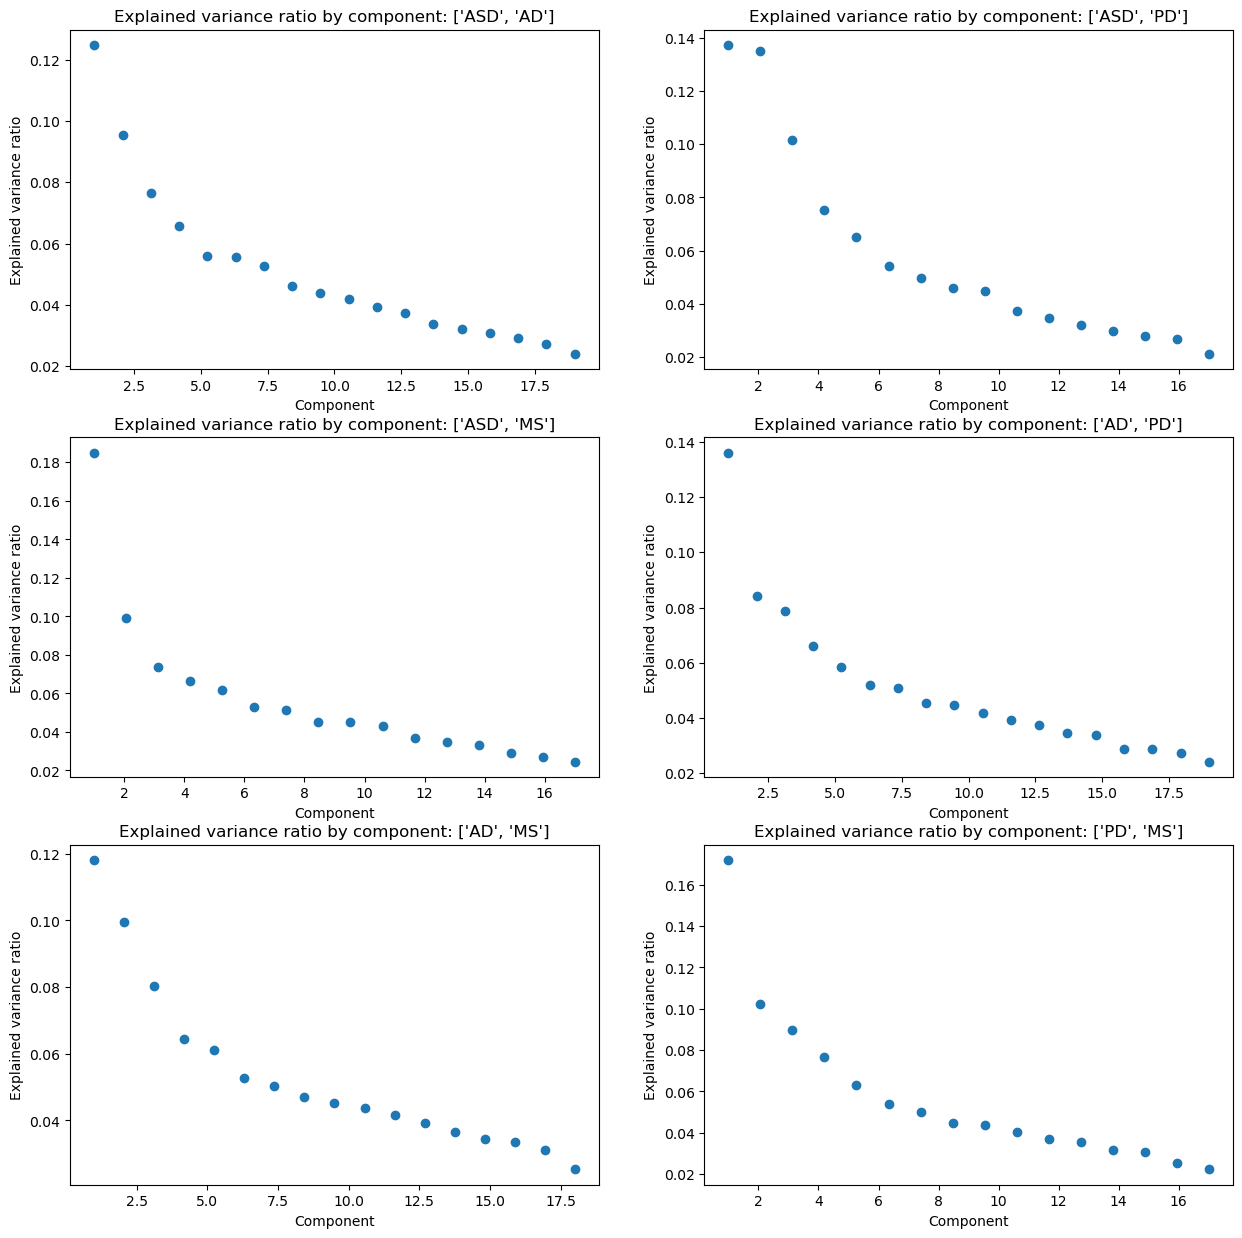

In [905]:
plt.figure(dpi = 200)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(out_df_pair)):
    pc = np.linspace(1, len(out_df_pair[i].columns)+1, len(out_df_pair[i].columns))
    axes[i].scatter(pc, var_ratio_pair[i])
    axes[i].set_title('Explained variance ratio by component: ' +  str(pairwise[i]))
    axes[i].set(xlabel='Component')
    axes[i].set(ylabel='Explained variance ratio');

**Visualize clustering by diagnosis with first two PCs:**

<Figure size 1280x960 with 0 Axes>

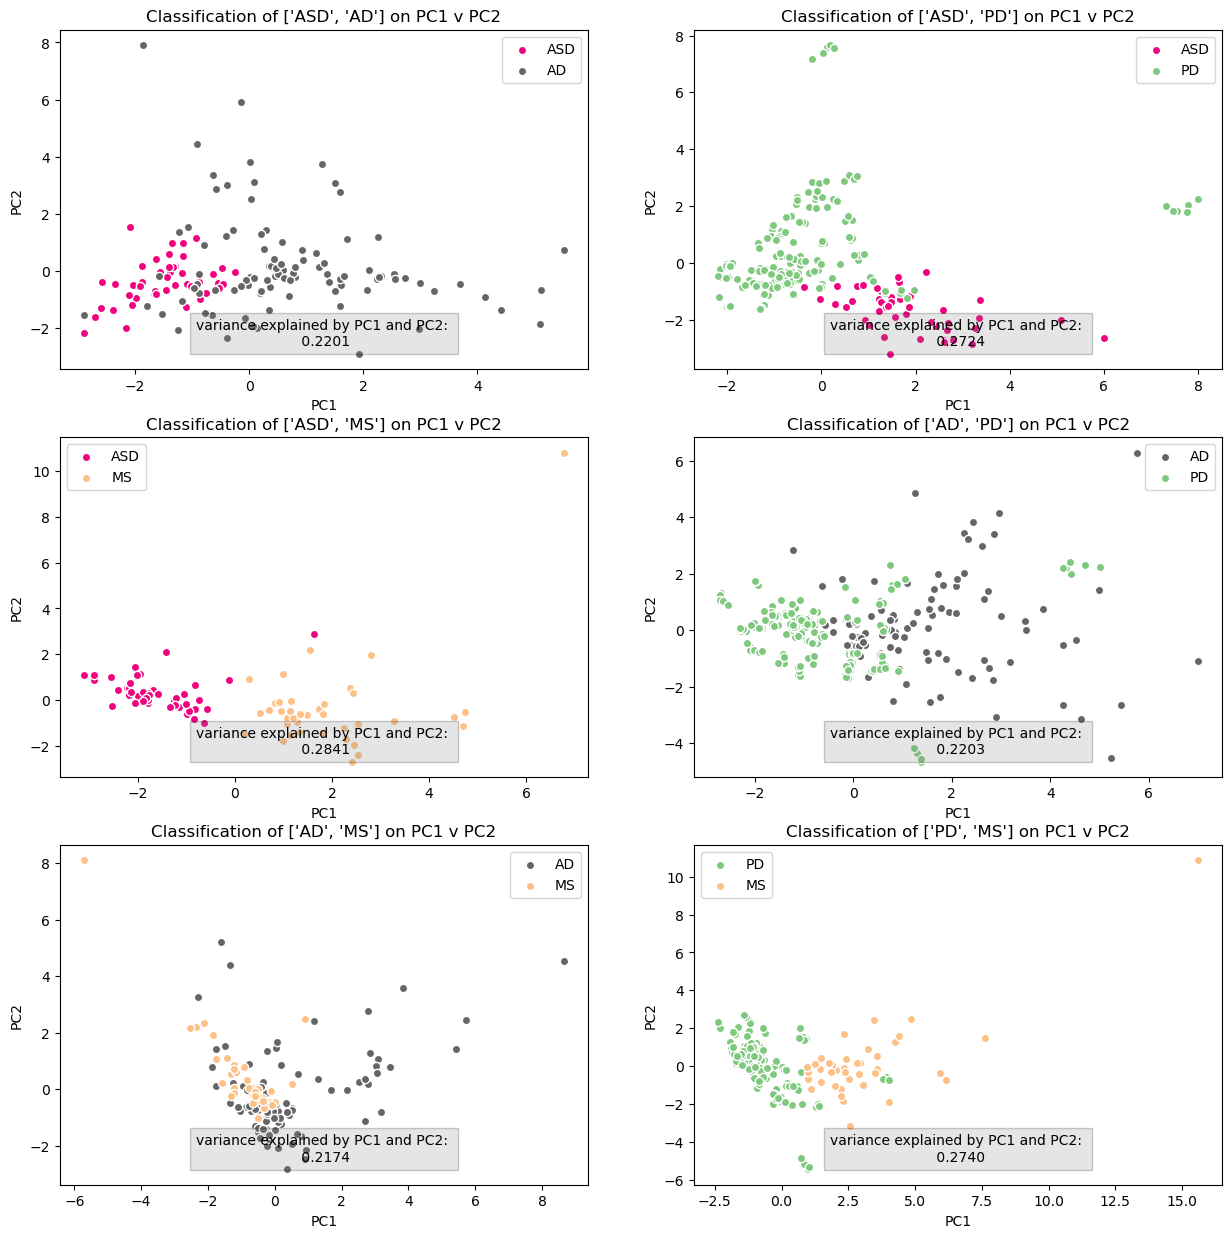

In [906]:
plt.figure(dpi = 200)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(out_df_pair)):
    
    diag_1 = []
    diag_2 = []
    
    for j in range(len(diagnosis_pair[i])):
        if diagnosis_pair[i][j]==pairwise[i][0]:
            diag_1.append(j)
        if diagnosis_pair[i][j]==pairwise[i][1]:
            diag_2.append(j)
    
    # plot PC1 v PC2, indicating which indices of these are which disease:
    axes[i].scatter(out_df_pair[i]['PC1'][diag_1], out_df_pair[i]['PC2'][diag_1], label=pairwise[i][0], color = color_map[pairwise[i][0]], edgecolor='white')
    axes[i].scatter(out_df_pair[i]['PC1'][diag_2], out_df_pair[i]['PC2'][diag_2], label=pairwise[i][1], color = color_map[pairwise[i][1]], edgecolor='white')
    
    
    axes[i].legend();
    axes[i].set(xlabel="PC1")
    axes[i].set(ylabel="PC2")
    axes[i].text(0.5, .15, "variance explained by PC1 and PC2: \n {:.4f}".format(var_ratio_pair[i][0] + var_ratio_pair[i][1]), transform=axes[i].transAxes, horizontalalignment='center',
    verticalalignment='top', bbox=dict(facecolor='gray', alpha=0.2))
    axes[i].set_title("Classification of " + str(pairwise[i]) + " on PC1 v PC2");
    
plt.savefig('../Figures/PCA_plots_paired.svg')

The loadings for the first principal component

<Figure size 1920x1440 with 0 Axes>

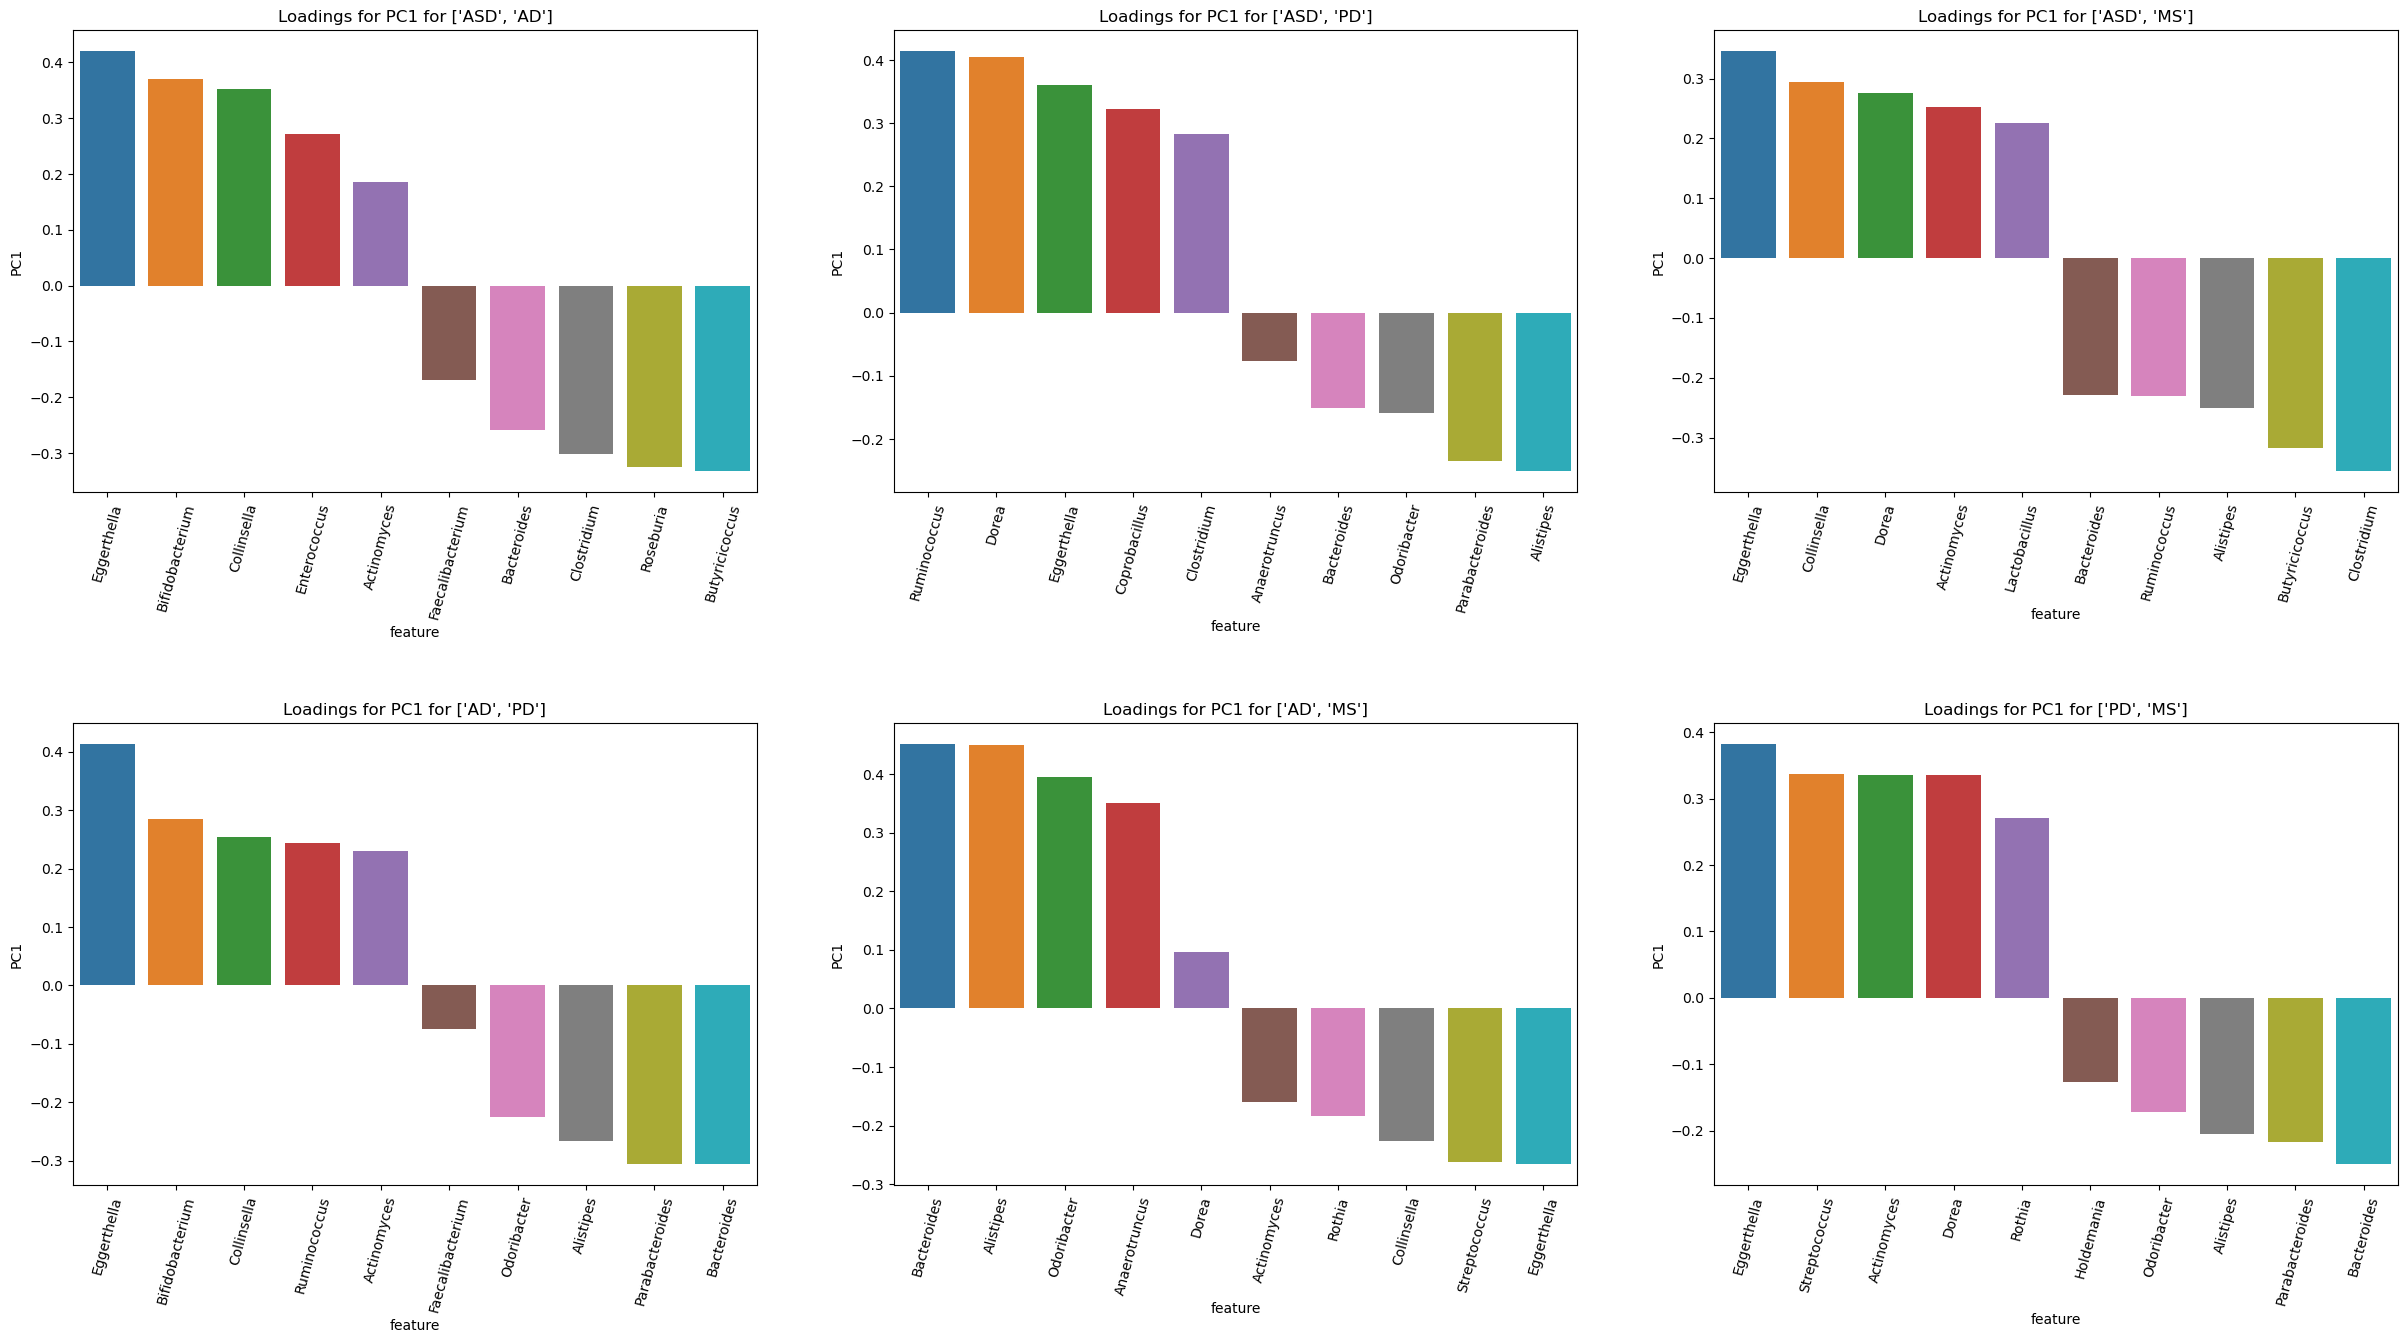

In [907]:
plt.figure(dpi = 300)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
plt.subplots_adjust(hspace=.5)
load_list = []

for i in range(len(pcs_pair)):
    pcs = pcs_pair[i]
    # create a dataframe with the load of the features in PC1:
    load = pd.DataFrame(np.transpose(pcs), columns=['PC'+str(i+1) for i in range(len(out_df_pair[i].columns))])
    load["feature"] = list(data_pair_1[i].columns)
    
    # descending values
    load1 = load.sort_values('PC1', ascending=False)
    load1_feat = pd.DataFrame(load1[["feature", 'PC1']], columns=['feature', 'PC1']) # for reference
    load_list.append(list(load1_feat["feature"]))
    

    load_out = pd.concat([load1_feat[:5], load1_feat[-5:]], ignore_index=True)
    
    # plot
    sns.barplot(load_out, x='feature', y='PC1', ax=axes[i]);
    axes[i].set_xticklabels(load_out['feature'], rotation=75);
    axes[i].set_title("Loadings for PC1 for " + str(pairwise[i]));

plt.savefig('../Figures/PCA_load_plots_paired.svg')

## Biplot creation

In [908]:
def biplot(dfScores, dfLoadings, ax):
    ''' directly sourced from https://insidelearningmachines.com/biplot/ . Altered to only show first five loadings (that contribute most to variance)'''
    
    #create figure and axis objects
    # fig,ax = plt.subplots(figsize=(15,8))
    
    #make a scores plot
    # ax.scatter(dfScores.PC1.values,dfScores.PC2.values, color='b')
    #set x-axis label
    ax.set_xlabel("PC1",fontsize=10)
    #set y-axis label
    ax.set_ylabel("PC2",fontsize=10)
    
    #create a second set of axes
    ax2 = ax.twinx().twiny()
    
    #setup font dictionary
    font = {'color':  'black',
            'weight': 'bold',
            'size': 12,
            }
    
    # sort the loadings plot:
    dfLoadings = dfLoadings.sort_values('PC1', axis=1, ascending=False)
    dfLoadings1 = dfLoadings.sort_values('PC2', axis=1, ascending=False)

    b = 0
    v_orient = ["top", "top", "top", "bottom"]
    h_orient = ["left", "right", "right", "right"]
    col_pc = ["red", "red", "blue", "blue"]

    list_show = [dfLoadings.columns.values[0], dfLoadings.columns.values[-1], dfLoadings1.columns.values[0], dfLoadings1.columns.values[-1]]
    
    #make a loadings plot
    # for col in list(dfLoadings.columns.values[:2]) + list(dfLoadings.columns.values[-2:]):
    for col in list_show:    
    # for col in list(dfLoadings.columns.values[:4]):
        #where do our loading vectors end?
        tipx = dfLoadings.loc['PC1',col]
        tipy = dfLoadings.loc['PC2',col]
        #draw the vector, and write label text for col
        ax2.arrow(0, 0, tipx, tipy, color = col_pc[b], alpha = 0.5)
        ax2.text(tipx*1.05, tipy*1.05, col, fontdict = font, ha = h_orient[b], va = v_orient[b])
        b +=1

    ax2.set_xlim(-.75, .75)
    ax2.set_ylim(-.75, .75)
    #align x = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    #align y = 0 of ax and ax2 with the center of figure
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)
    
    #show plot
    # plt.show()

<Figure size 1920x1440 with 0 Axes>

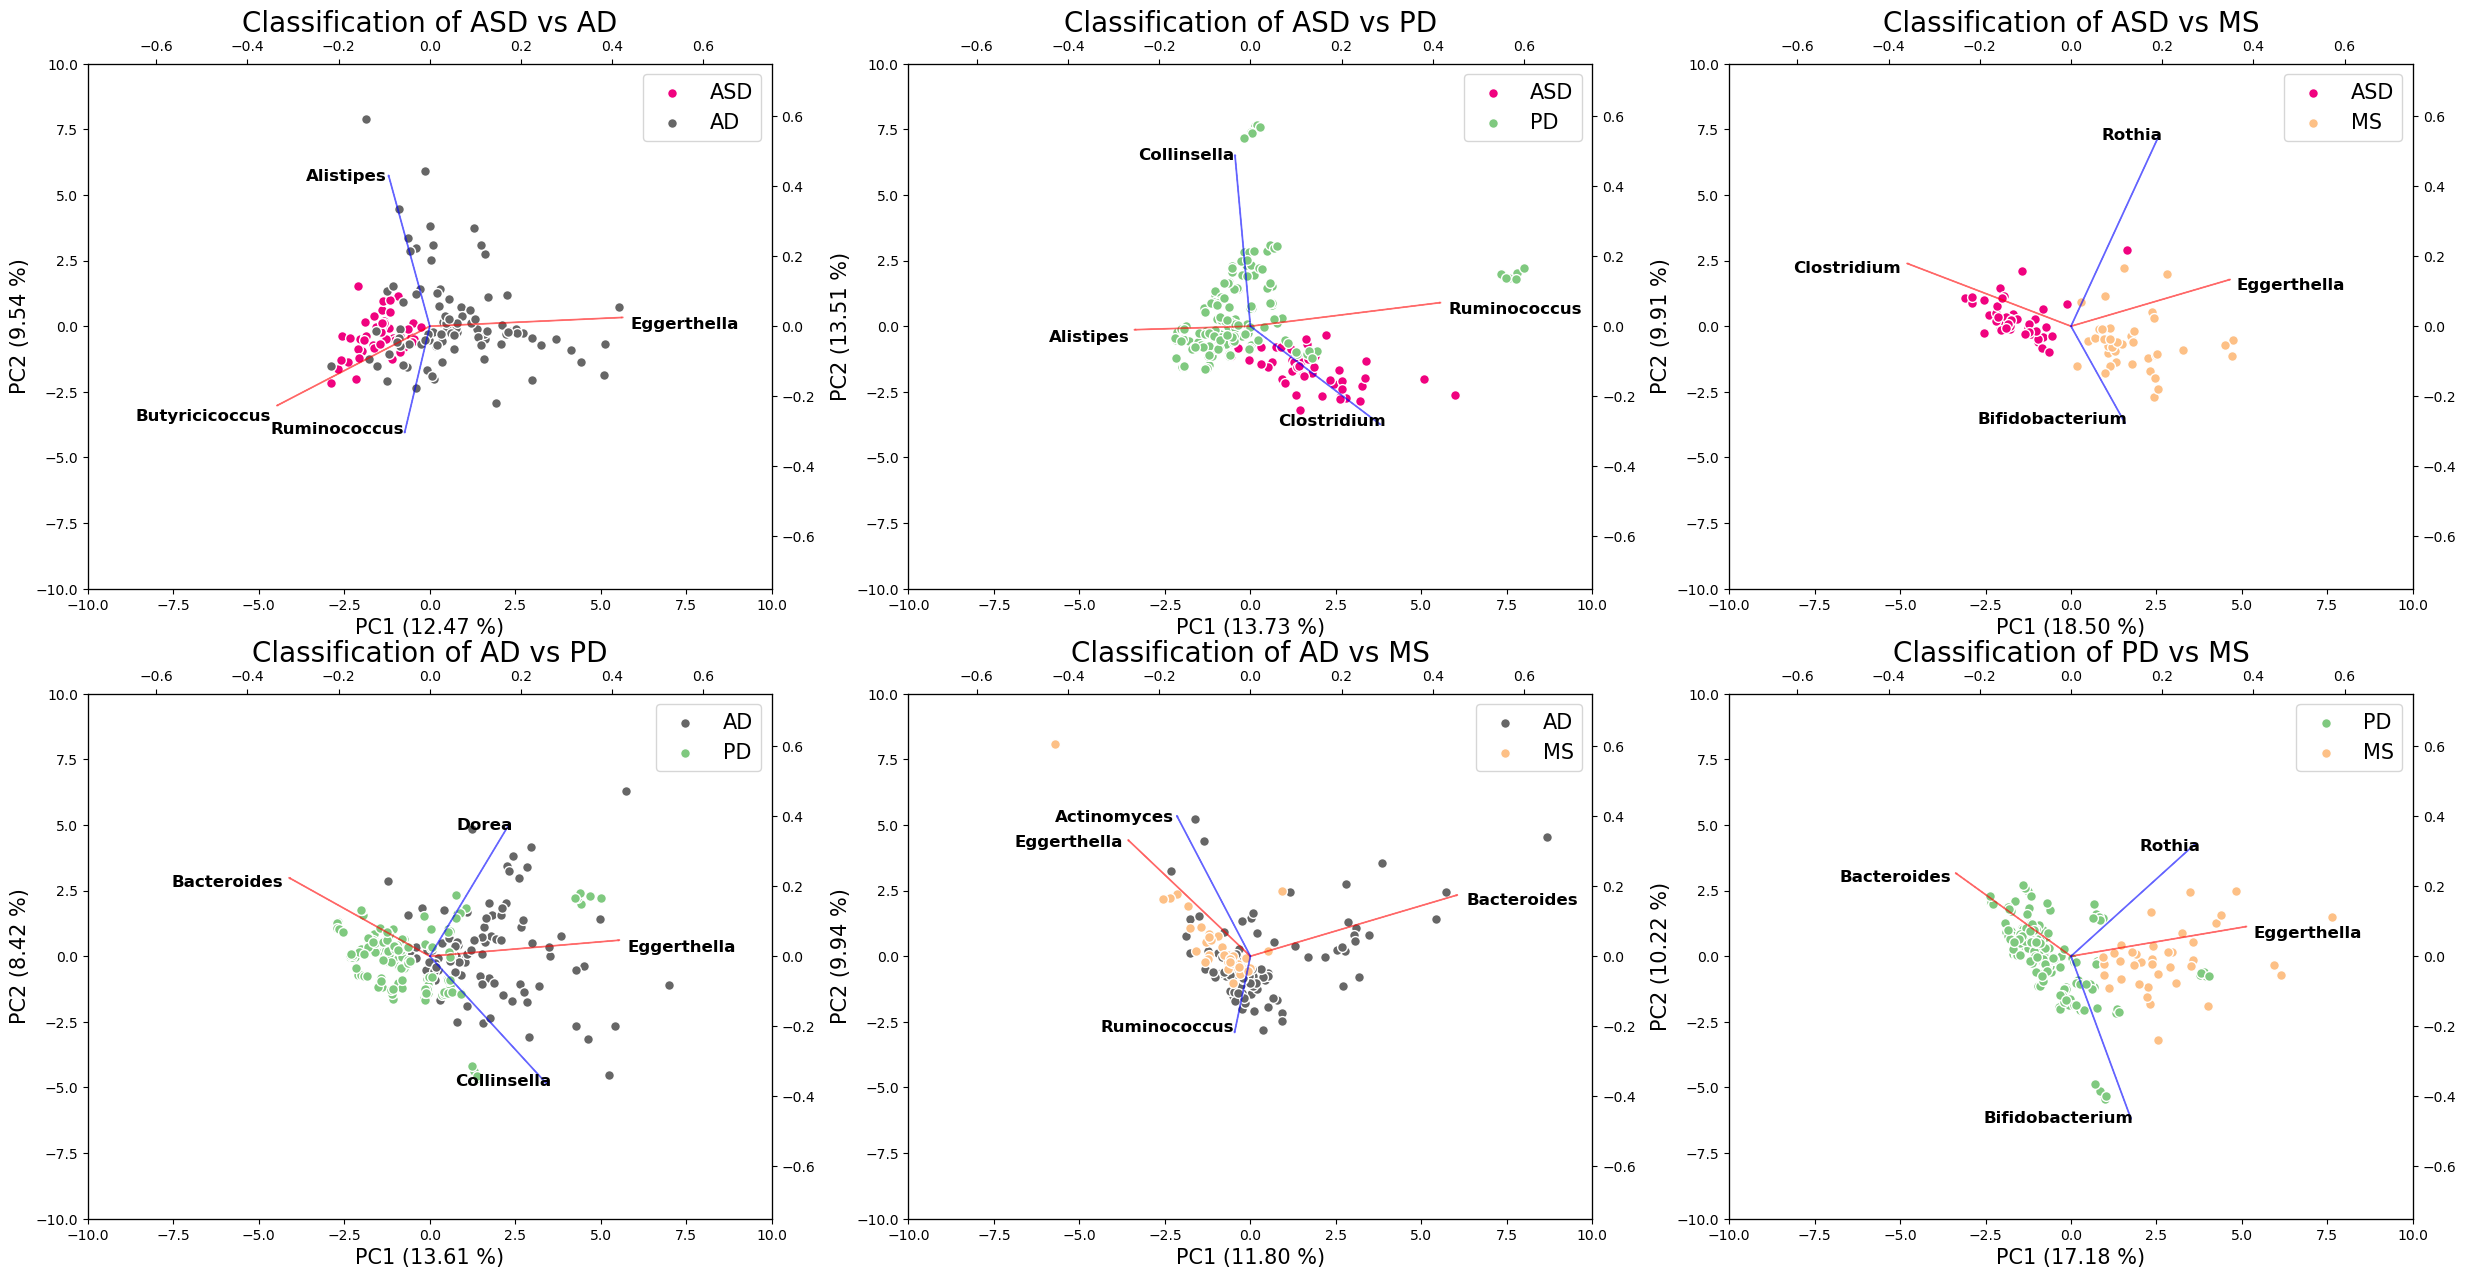

In [909]:
plt.figure(dpi = 300)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
plt.subplots_adjust(hspace=.2)

for i in range(len(out_df_pair)):
    
    diag_1 = []
    diag_2 = []
    
    for j in range(len(diagnosis_pair[i])):
        if diagnosis_pair[i][j]==pairwise[i][0]:
            diag_1.append(j)
        if diagnosis_pair[i][j]==pairwise[i][1]:
            diag_2.append(j)
    
    # plot PC1 v PC2, indicating which indices of these are which disease:
    axes[i].scatter(out_df_pair[i]['PC1'][diag_1], out_df_pair[i]['PC2'][diag_1], label=pairwise[i][0], color = color_map[pairwise[i][0]], edgecolor='white', s=50)
    axes[i].scatter(out_df_pair[i]['PC1'][diag_2], out_df_pair[i]['PC2'][diag_2], label=pairwise[i][1], color = color_map[pairwise[i][1]], edgecolor='white', s=50)
    
    biplot(out_df_pair[i], loadings_pair[i], axes[i])
    axes[i].legend(fontsize=15);
    
    axes[i].set_xlabel(xlabel="PC1 ({:.2f} %)".format(var_ratio_pair[i][0] * 100), fontsize=15)
    axes[i].set_ylabel(ylabel="PC2 ({:.2f} %)".format(var_ratio_pair[i][1] * 100), fontsize=15)

    axes[i].set_xlim(-10, 10)
    axes[i].set_ylim(-10, 10)
    axes[i].set_title("Classification of " + pairwise[i][0] + ' vs ' + pairwise[i][1], fontsize=20);

plt.savefig('../Figures/PCA_biplots_paired.svg')

<Figure size 1920x1440 with 0 Axes>

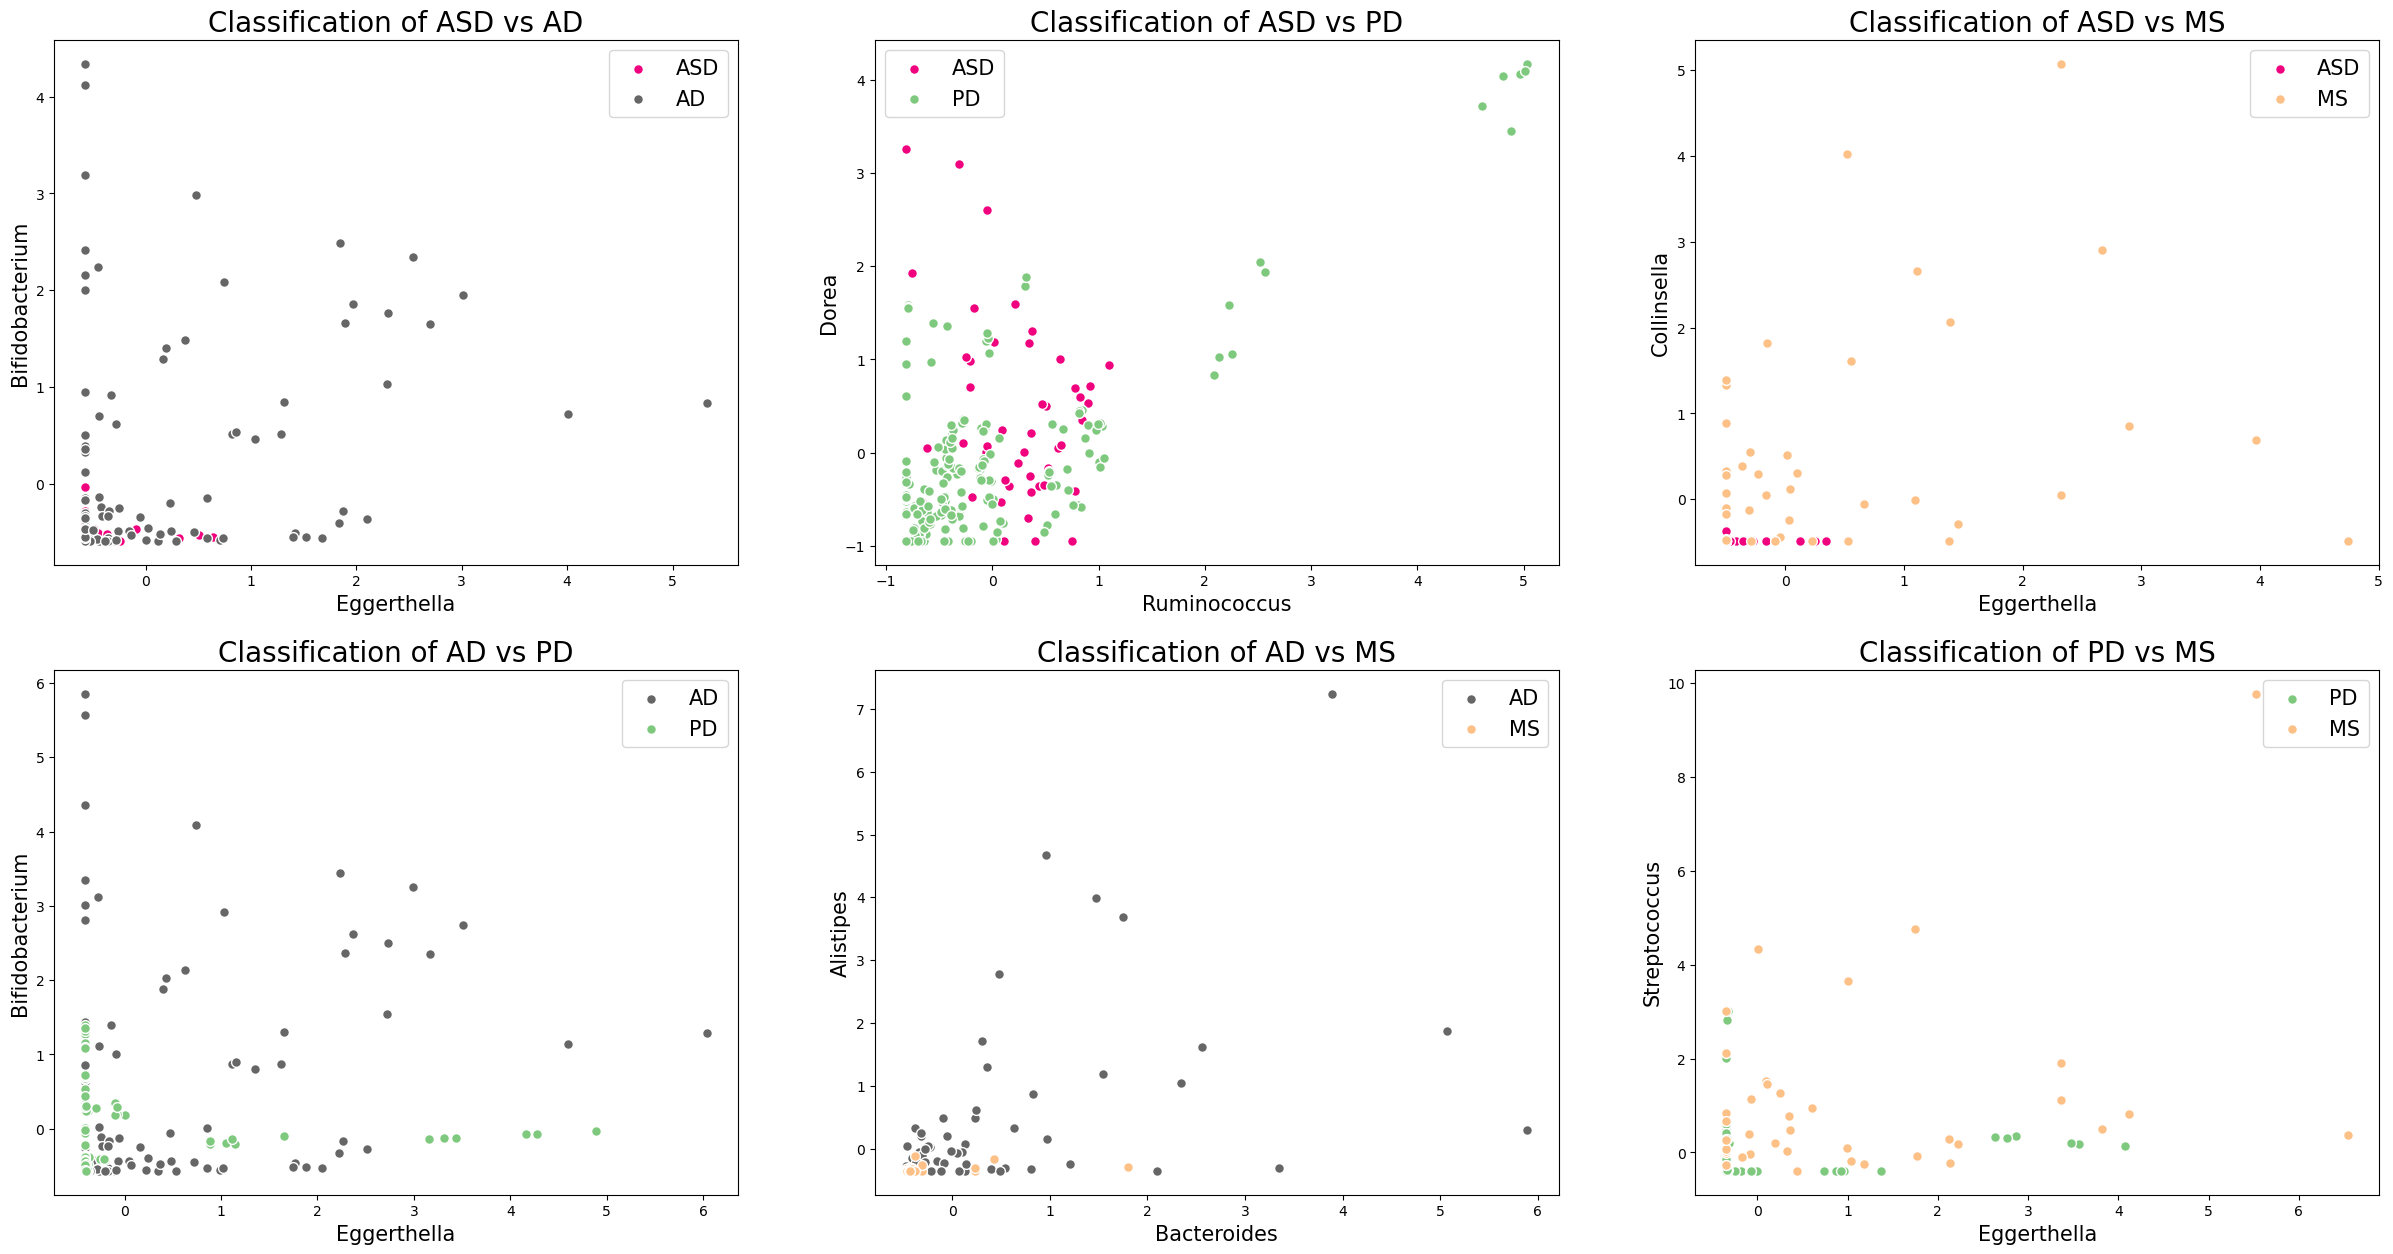

In [910]:
 plt.figure(dpi = 300)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
plt.subplots_adjust(hspace=.2)

for i in range(len(out_df_pair)):
    
    diag_1 = []
    diag_2 = []

    feat_1 = load_list[i][0]
    feat_2 = load_list[i][1]
    
    for j in range(len(diagnosis_pair[i])):
        if diagnosis_pair[i][j]==pairwise[i][0]:
            diag_1.append(j)
        if diagnosis_pair[i][j]==pairwise[i][1]:
            diag_2.append(j)
    
    # plot PC1 v PC2, indicating which indices of these are which disease:
    axes[i].scatter(data_pair_1[i][feat_1][diag_1], data_pair_1[i][feat_2][diag_1], label=pairwise[i][0], color = color_map[pairwise[i][0]], edgecolor='white', s=50)
    axes[i].scatter(data_pair_1[i][feat_1][diag_2], data_pair_1[i][feat_2][diag_2], label=pairwise[i][1], color = color_map[pairwise[i][1]], edgecolor='white', s=50)
    
    axes[i].legend(fontsize=15);
    
    axes[i].set_xlabel(feat_1, fontsize=15)
    axes[i].set_ylabel(feat_2, fontsize=15)

    axes[i].set_title("Classification of " + pairwise[i][0] + ' vs ' + pairwise[i][1], fontsize=20);

plt.savefig('../Figures/PCA_feat_plots_paired.svg')

## RF Classifier

In [911]:
diag_test_pair = []
diag_train_pair = []
out_pair = []
diag_predict_pair = []
rf_pair = []
importance_feat = []

from sklearn.inspection import permutation_importance

for i in range(len(data_pair_1)):
    # set up classifier
    rf = RandomForestClassifier(n_estimators=100) # 100 trees in the forest.
    # 100 trees means 100 sub-samples of data
    
    # make training and testing sets:
    feat_train, feat_test, diag_train, diag_test = sk.model_selection.train_test_split(data_pair_1[i], diagnosis_pair[i], test_size=0.75)
    # chose a test size of 30%
    
    # train:
    out = rf.fit(feat_train, diag_train)
    
    # test:
    diag_predict = rf.predict(feat_test)

    # store info:
    diag_test_pair.append(diag_test)
    diag_train_pair.append(diag_train)
    out_pair.append(out)
    diag_predict_pair.append(diag_predict)
    perm_importance = permutation_importance(rf, feat_test, diag_test, n_repeats=100)
    importance_feat.append(perm_importance)
    rf_pair.append(rf)

**Accuracy of classifier**

In [912]:
for i in range(len(diag_test_pair)):
    acc = sk.metrics.accuracy_score(diag_test_pair[i], diag_predict_pair[i])
    print("accuracy for " + str(pairwise[i]) + " {:.3f}".format(acc))

accuracy for ['ASD', 'AD'] 0.937
accuracy for ['ASD', 'PD'] 0.995
accuracy for ['ASD', 'MS'] 1.000
accuracy for ['AD', 'PD'] 0.956
accuracy for ['AD', 'MS'] 0.771
accuracy for ['PD', 'MS'] 0.973


**Table of importances**

In [913]:
imp_table_pair = []
df_imp = []
for i in range(len(data_pair_1)):
    # find importance of each feature:
    feat = data_pair_1[i].columns
    feat_importance = rf_pair[i].feature_importances_
    
    # make and print table of ranked features by importance:
    imp_table = pd.DataFrame(feat, columns=['features'])
    imp_table['importance'] = feat_importance
    imp_table_sort = imp_table.sort_values('importance', ascending=False)
    imp_table_sort = imp_table_sort.round(3)
    feat_sort = list(imp_table_sort['features']) # use this for plotting and storing the features
    imp_table_pair.append(feat_sort)
    df_imp.append(imp_table_sort)
    imp_table_sort.to_csv('../Data/feature_importance/' + "feature_importance_" + pairwise[i][0] + '_' + pairwise[i][1] + '.csv')  

In [914]:
df_imp[0].head()

,features,importance
1,Bacteroides,0.175
4,Clostridium,0.136
7,Faecalibacterium,0.100
3,Butyricicoccus,0.088
13,Roseburia,0.085


<Figure size 1920x1440 with 0 Axes>

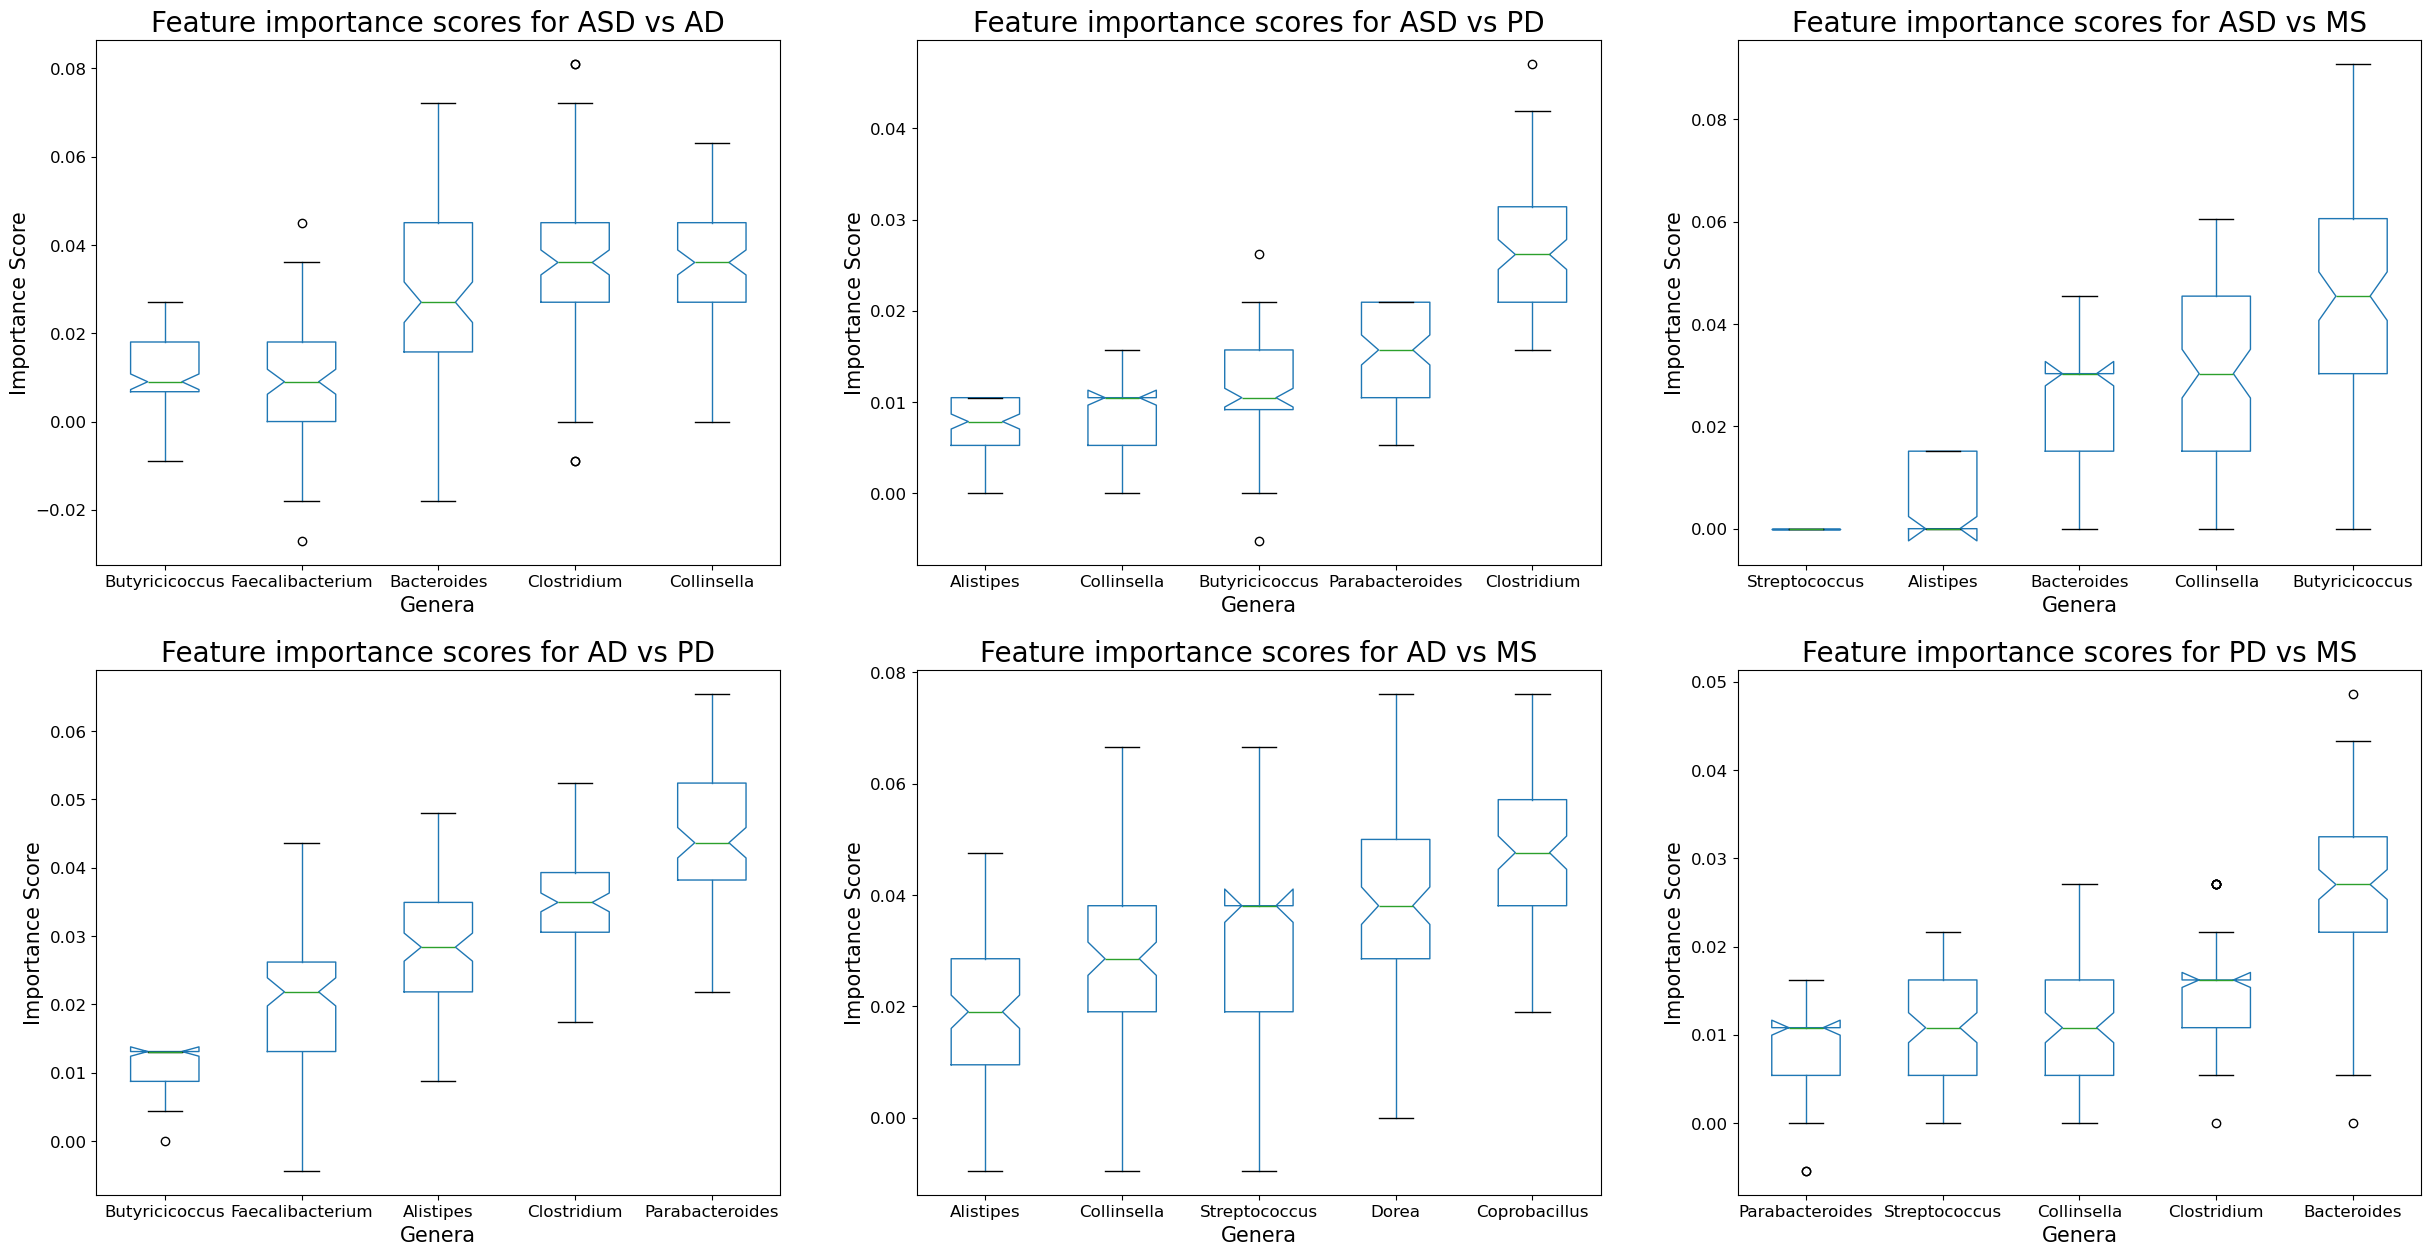

In [915]:
imp_data = []
for i in range(len(pairwise)):
    sorted_idx = importance_feat[i].importances_mean.argsort()
    imp_data.append(pd.DataFrame(importance_feat[i].importances[sorted_idx].transpose(), columns=data_pair_1[i].columns[sorted_idx]))

plt.figure(dpi = 300)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]


for i in range(len(pairwise)):
    imp_data[i].boxplot(list(imp_data[i].columns[-5:]), grid=False, ax=axes[i], meanline=True, fontsize=12, notch=True)
    axes[i].set_xlabel(xlabel="Genera", fontsize=15)
    axes[i].set_ylabel(ylabel="Importance Score", fontsize=15)
    axes[i].set_title("Feature importance scores for " + str(pairwise[i][0]) + ' vs ' + str(pairwise[i][1]), fontsize=20);

plt.savefig('../Figures/RF_importance_plots_paired.svg')

**XY scatter of important features**

<Figure size 1920x1440 with 0 Axes>

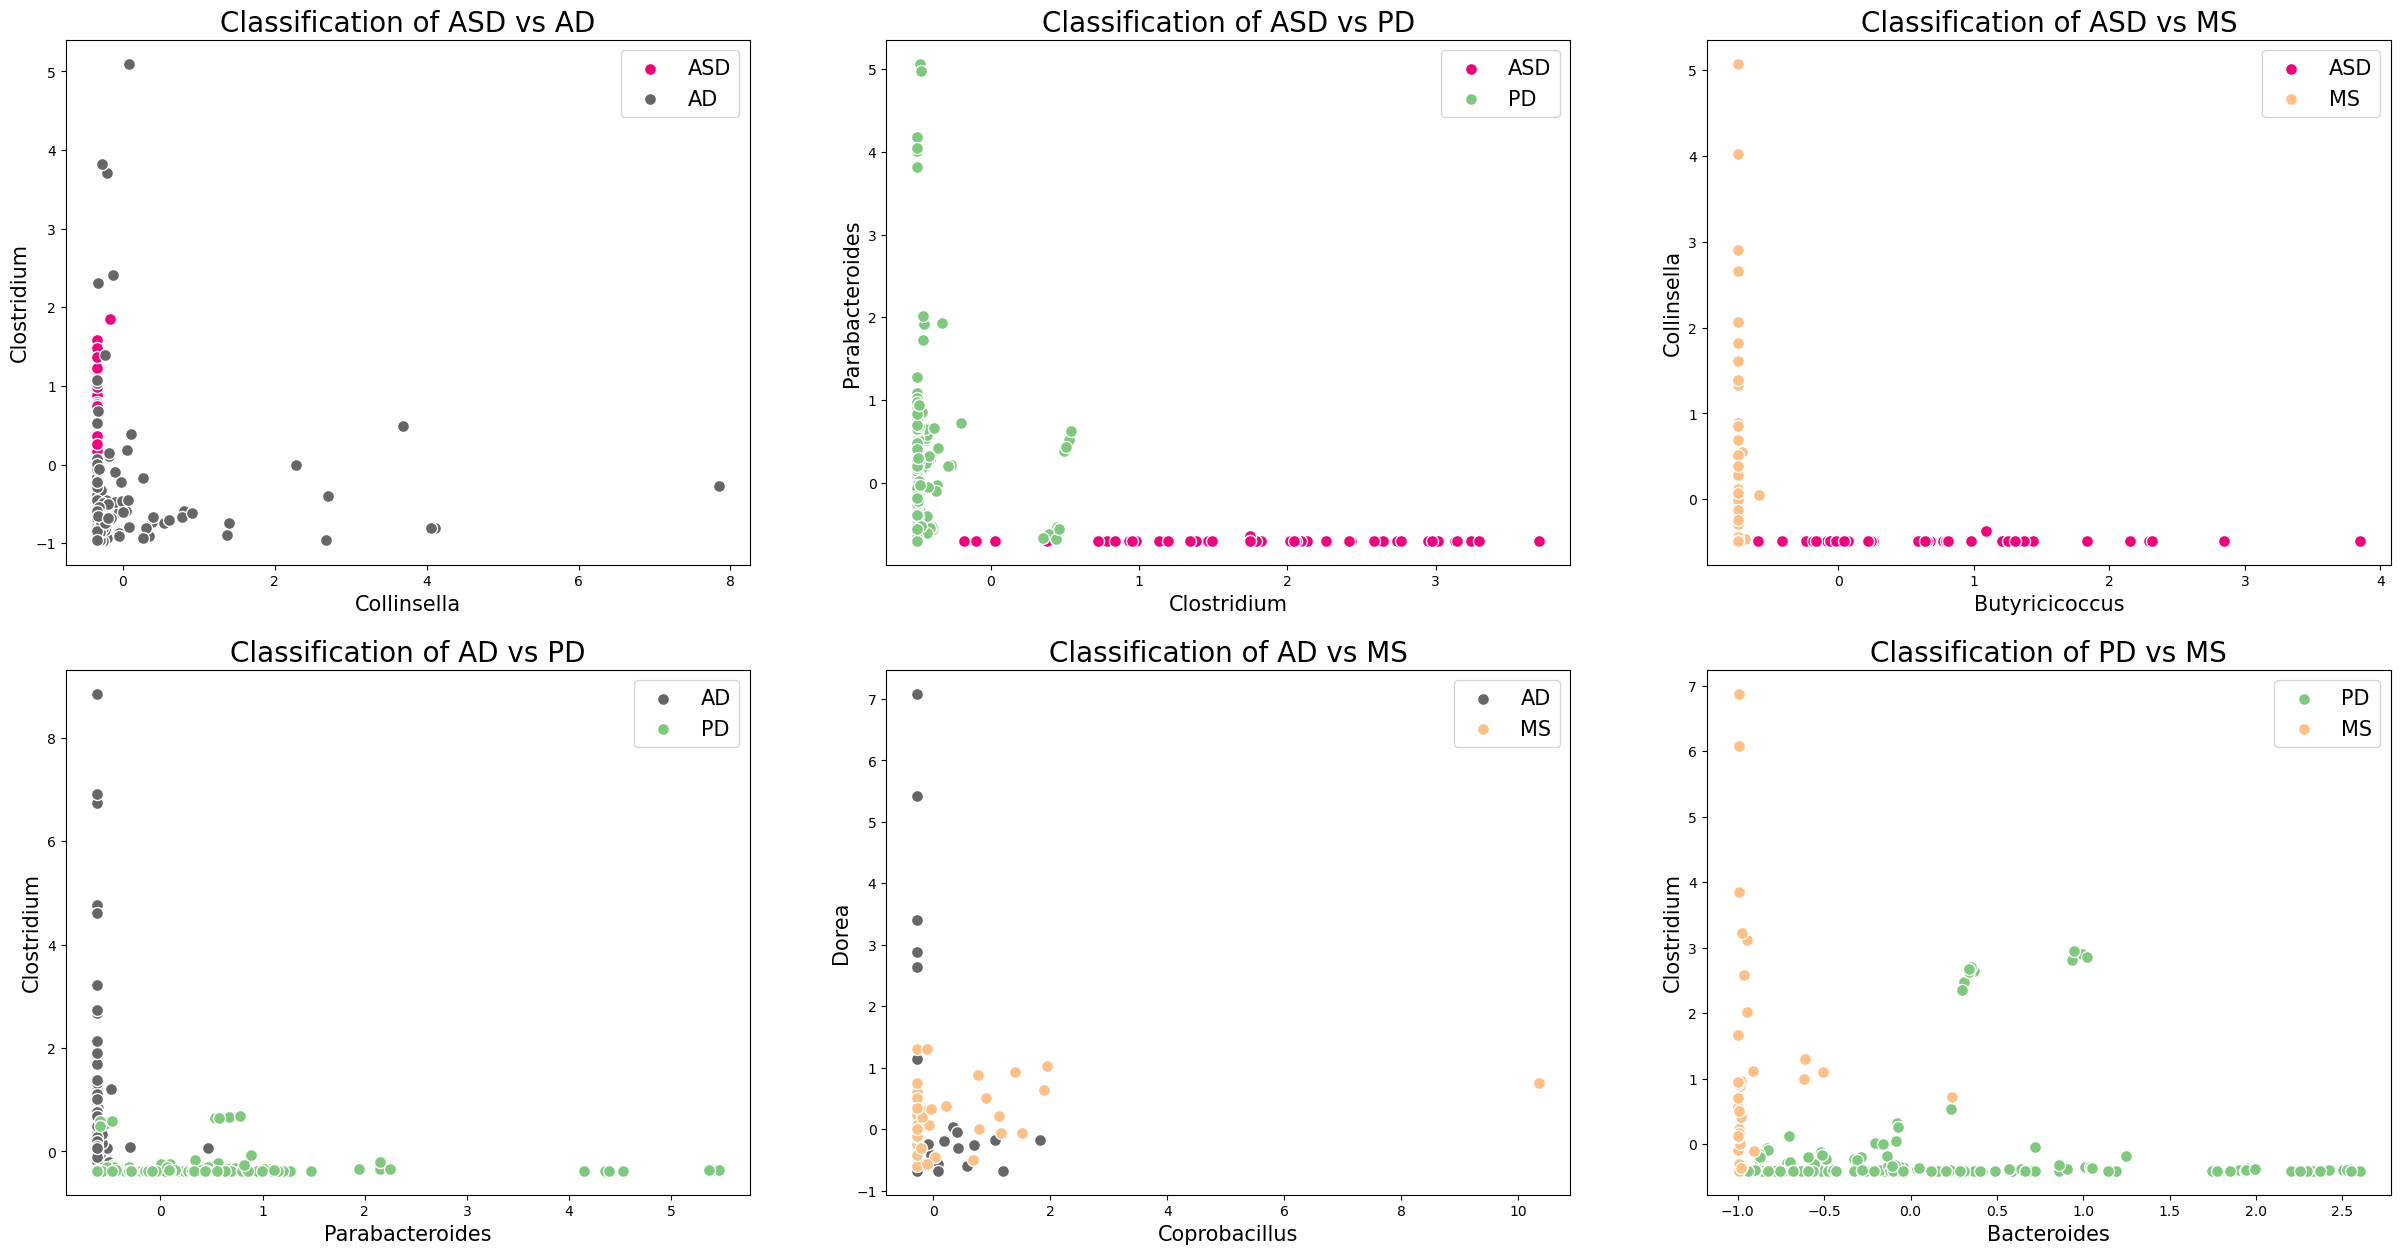

In [916]:
plt.figure(dpi = 300)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(len(data_pair_1)):

    diag_1 = []
    diag_2 = []

    feat1 = imp_data[i].columns[-1]
    feat2 = imp_data[i].columns[-2]
    
    for j in range(len(data_pair_1[i])):
        if diagnosis_pair[i][j]==pairwise[i][0]:
            diag_1.append(j)
        if diagnosis_pair[i][j]==pairwise[i][1]:
            diag_2.append(j)
    
    # use the top two most important features from the table of ranked importances

    axes[i].scatter(data_pair_1[i].reset_index()[feat1][diag_1], data_pair_1[i].reset_index()[feat2][diag_1], label=pairwise[i][0], color = color_map[pairwise[i][0]], edgecolor='white', s=75)
    axes[i].scatter(data_pair_1[i].reset_index()[feat1][diag_2], data_pair_1[i].reset_index()[feat2][diag_2], label=pairwise[i][1], color = color_map[pairwise[i][1]], edgecolor='white', s=75)
    
    axes[i].legend(fontsize=15);
    
    axes[i].set_xlabel(feat1, fontsize=15);
    axes[i].set_ylabel(feat2, fontsize=15);
    
    axes[i].set_title("Classification of " + str(pairwise[i][0]) + ' vs ' + str(pairwise[i][1]), fontsize=20);
plt.savefig('../Figures/RF_feature_plots_paired.svg')

**Look at Gini importance and get decision tree**

In [917]:
# followed this tutorial for getting image: https://naysan.ca/2019/11/26/visualize-a-decision-tree-with-sklearn/
# i just plotted one of the trees:
graphs = []
Images = []
for i in range(len(out_pair)):
    out_file = sk.tree.export_graphviz(out_pair[i][1], label='all', feature_names=imp_table_pair[i], class_names= pairwise[i])
    
    graphs.append(pydotplus.graph_from_dot_data(out_file))
    Images.append(Image(graphs[i].create_png()))

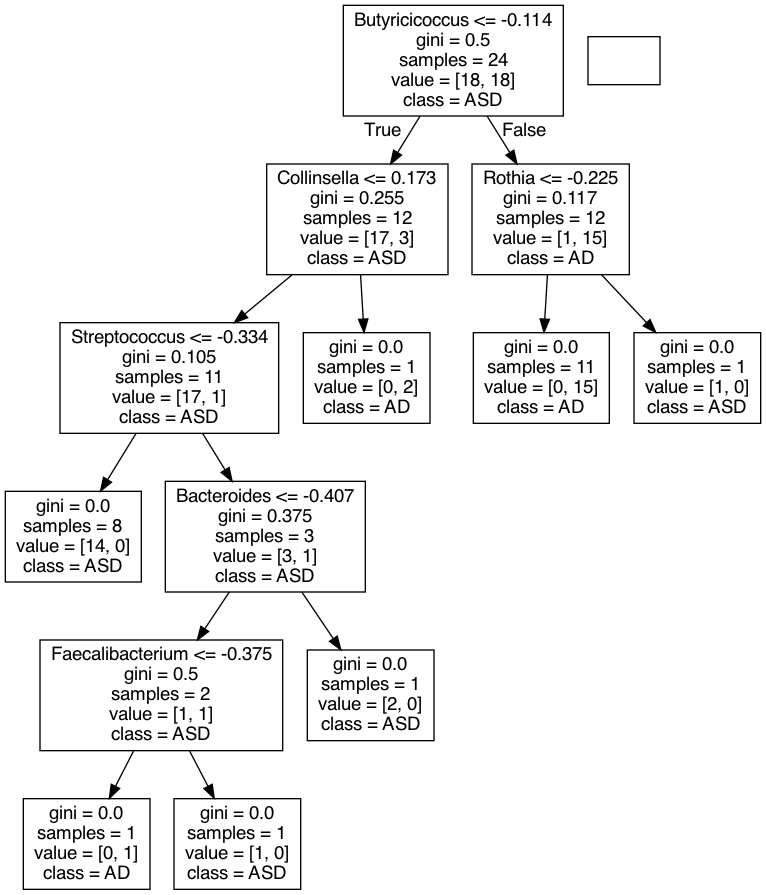

In [918]:
Images[0]